In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [57]:
# 1. Load Data
students = pd.read_csv("/content/drive/MyDrive/students (2).csv")
courses  = pd.read_csv("/content/drive/MyDrive/courses.csv")

In [58]:
students.head()

,StudentID,Name,Subjects,Grade,Interests,Preferred_Field,Career_Goal,Learning_Style
0,STU0001,Student_1,"Math, Physics, Chemistry",37.54,Health,Health,Nurse,Visual
1,STU0002,Student_2,"Geography, Agriculture, Biology",29.60,Environmental Science,Environmental Science,Conservationist,Auditory
2,STU0003,Student_3,"Math, Physics, Chemistry",28.81,IT,IT,Software Developer,Visual
3,STU0004,Student_4,"Math, Physics, Chemistry",41.77,Health,Health,Nurse,Visual
4,STU0005,Student_5,"Math, Physics, Computer",29.71,Engineering,Engineering,Engineer,Self-paced


In [59]:
courses.tail()

,Course_ID,Course_Name,Field,Level,Required_Subjects,Min_Grade,Skills_Taught,Description
98,1057200,Bachelor of Science in Health Sciences,Health Sciences,Undergraduate,"Bio C+, Chem C+, Math/Phys C+, Eng/Kis C+",39.968,"clinical care, patient management, pharmacology",Prepares students for roles in healthcare and ...
99,1249117,Bachelor of Science in Electrical and Electron...,Engineering,Undergraduate,"Math C+, Physics C+, Chem C+, Eng/Kis C",43.721,"circuits, electronics, control systems, power ...",Prepares students for careers in electrical sy...
100,1249111,Bachelor of Science in Civil Engineering,Engineering,Undergraduate,"Math C+, Physics C+, Chem C+, Eng/Kis C",42.134,"structures, water resources, geotechnical engi...","Focuses on the design, construction, and maint..."
101,1263129,Bachelor of Science in Mechanical Engineering,Engineering,Undergraduate,"Math C+, Physics C+, Chem C+, Eng/Kis C",41.876,"thermodynamics, CAD, machine design, fluid mec...",Equips students with skills in mechanical syst...
102,1263132,Bachelor of Science in Mechatronic Engineering,Engineering,Undergraduate,"Math C+, Physics C+, Chem C+, Eng/Kis C",44.011,"robotics, control systems, embedded systems","Combines mechanical, electrical, and computer ..."


In [60]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        200 non-null    object 
 1   Name             200 non-null    object 
 2   Subjects         200 non-null    object 
 3   Grade            200 non-null    float64
 4   Interests        200 non-null    object 
 5   Preferred_Field  200 non-null    object 
 6   Career_Goal      200 non-null    object 
 7   Learning_Style   200 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.6+ KB


In [61]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course_ID          103 non-null    int64  
 1   Course_Name        103 non-null    object 
 2   Field              103 non-null    object 
 3   Level              103 non-null    object 
 4   Required_Subjects  103 non-null    object 
 5   Min_Grade          103 non-null    float64
 6   Skills_Taught      103 non-null    object 
 7   Description        103 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.6+ KB


In [62]:
print("Students:", students.shape)
print("Courses:", courses.shape)

Students: (200, 8)
Courses: (103, 8)


In [63]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
# Download the required punkt_tab resource
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [64]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    # word_tokenize uses Punkt sentence tokenizer internally, which requires the missing resource
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)


In [65]:

students["Clean_Profile"] = students["Subjects"] + " " + students["Interests"] + " " + students["Career_Goal"]
students["Clean_Profile"] = students["Clean_Profile"].apply(clean_text)

In [66]:
courses["Clean_Course"] = (
    courses["Required_Subjects"] + " " +
    courses["Skills_Taught"] + " " +
    courses["Description"]
).apply(clean_text)

In [67]:
print("--- Cleaned Student Profile ---")
print(students[["StudentID", "Clean_Profile"]].head(), "\n")

print("--- Cleaned Course Profile ---")
print(courses[["Course_ID", "Clean_Course"]].head())

--- Cleaned Student Profile ---
  StudentID                                      Clean_Profile
0   STU0001                math physics chemistry health nurse
1   STU0002  geography agriculture biology environmental sc...
2   STU0003          math physics chemistry software developer
3   STU0004                math physics chemistry health nurse
4   STU0005         math physics computer engineering engineer 

--- Cleaned Course Profile ---
   Course_ID                                       Clean_Course
0    1057101  math engkis c chembio c probability statistics...
1    1057102  math engkis c chembio c probability statistics...
2    1057103  bio c chem c mathphys c engkis c clinical care...
3    1057104  bio c chem c mathphys c engkis c clinical care...
4    1057105  math c engkis c bio c curriculum design pedago...


In [70]:
# Combine both student and course text for joint vector space
all_text = pd.concat([students["Clean_Profile"], courses["Clean_Course"]])

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_text)

In [72]:
# Separate back out into student and course vectors
student_tfidf = tfidf_matrix[:len(students)]
course_tfidf = tfidf_matrix[len(students):]

# Compute cosine similarity between each student and each course
similarity_matrix = cosine_similarity(student_tfidf, course_tfidf)


In [73]:
top_n = 3
recommendations = []

for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-top_n:][::-1]
    top_courses = courses.iloc[top_indices][["Course_ID", "Course_Name", "Description"]]
    for rank, row in top_courses.iterrows():
        recommendations.append({
            "StudentID": students.iloc[i]["StudentID"],
            "Course_ID": row["Course_ID"],
            "Course_Name": row["Course_Name"],
            "Description": row["Description"],
            "Similarity_Score": similarity_matrix[i][rank]
        })

df_recommendations = pd.DataFrame(recommendations)


In [74]:
# Merge course field info into recommendations
merged = df_recommendations.merge(courses[["Course_ID", "Field"]], on="Course_ID")

# Calculate average match score per course field
avg_field_scores = merged.groupby("Field")["Similarity_Score"].mean().sort_values(ascending=False)


/tmp/ipython-input-77-4279020645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_field_scores.values, y=avg_field_scores.index, palette="viridis")


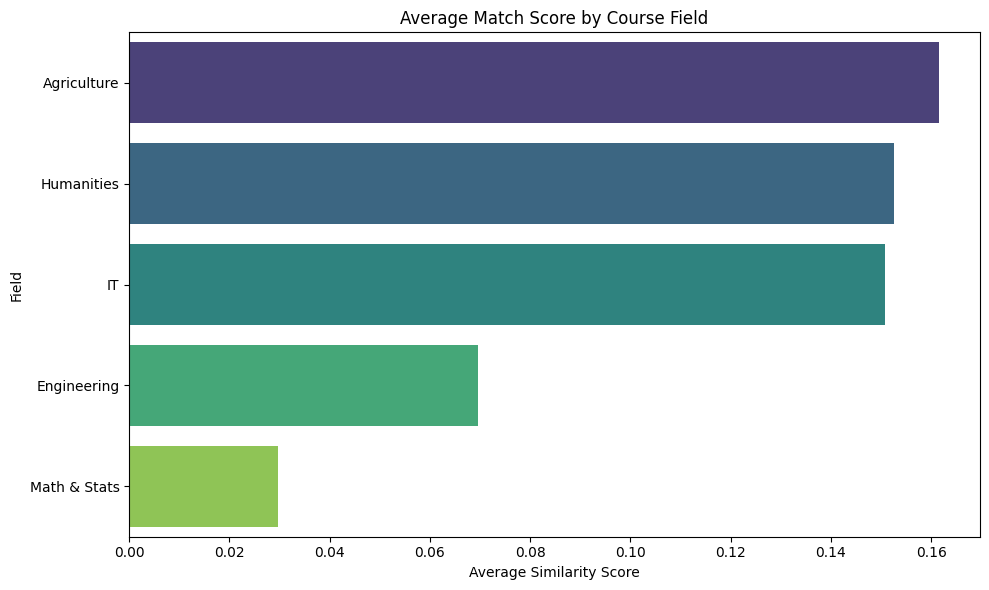

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_field_scores.values, y=avg_field_scores.index, palette="viridis")
plt.title("Average Match Score by Course Field")
plt.xlabel("Average Similarity Score")
plt.ylabel("Field")
plt.tight_layout()
plt.show()

/tmp/ipython-input-79-4229924064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_courses.values, y=top_courses.index, palette="plasma")


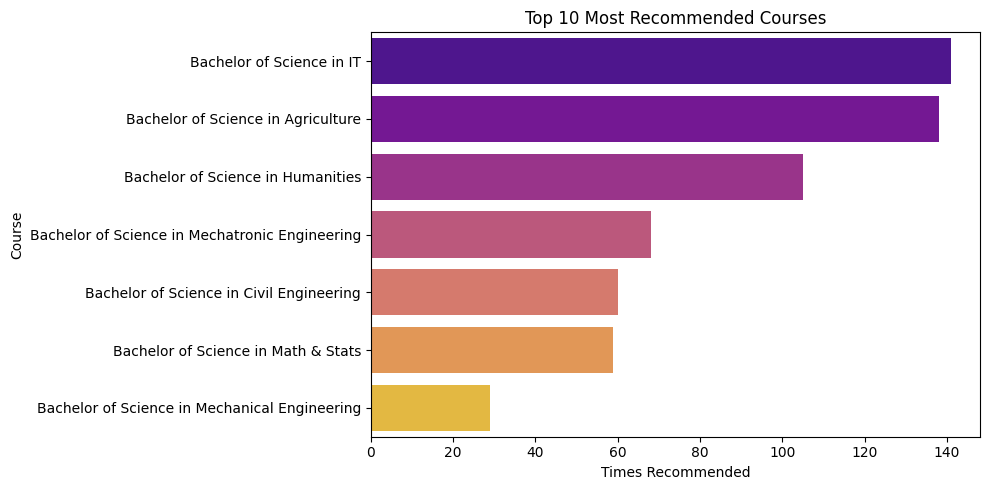

In [79]:
top_courses = df_recommendations["Course_Name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_courses.values, y=top_courses.index, palette="plasma")
plt.title("Top 10 Most Recommended Courses")
plt.xlabel("Times Recommended")
plt.ylabel("Course")
plt.tight_layout()
plt.show()


In [81]:
# Compare recommended course fields to student preferred fields
recommend_with_student = df_recommendations.merge(students[["StudentID", "Preferred_Field"]], on="StudentID")

# Add the 'Field' column from the courses DataFrame to the merged DataFrame
# This merge is done on the 'Course_ID' which exists in df_recommendations and courses
recommend_with_student = recommend_with_student.merge(courses[["Course_ID", "Field"]], on="Course_ID")

recommend_with_student["Field_Match"] = recommend_with_student["Preferred_Field"] == recommend_with_student["Field"]

# Field match percentage
field_match_rate = recommend_with_student["Field_Match"].mean()
print(f" Field Match Rate: {field_match_rate * 100:.2f}%")



 Field Match Rate: 23.33%


In [82]:
# Add student grade to each recommendation
recommend_with_student = recommend_with_student.merge(students[["StudentID", "Grade"]], on="StudentID")
recommend_with_student = recommend_with_student.merge(courses[["Course_ID", "Min_Grade"]], on="Course_ID")

# Eligibility = student grade >= min course grade
recommend_with_student["Grade_Eligible"] = recommend_with_student["Grade"] >= recommend_with_student["Min_Grade"]

# Eligibility rate
eligible_rate = recommend_with_student["Grade_Eligible"].mean()
print(f"📈 Grade Eligibility Rate: {eligible_rate * 100:.2f}%")


📈 Grade Eligibility Rate: 31.00%


In [88]:
# Empty list to store improved recommendations
improved_recommendations = []
boost_factor = 1.5  # Boost similarity score for field match

# Loop over each student
for i in range(len(students)):
    student_vector = student_tfidf[i]
    student_id = students.iloc[i]["StudentID"]
    student_grade = students.iloc[i]["Grade"]
    student_field = students.iloc[i]["Preferred_Field"]

    # Filter eligible courses (grade threshold)
    eligible_courses = courses[courses["Min_Grade"] <= student_grade].copy()

    # If none are eligible, skip or take top based on similarity
    if eligible_courses.empty:
        continue

    # Recompute similarity for only eligible courses
    eligible_vectors = course_tfidf[eligible_courses.index]
    similarities = cosine_similarity(student_vector, eligible_vectors).flatten()

    # Apply boosting for field match
    for idx, course_idx in enumerate(eligible_courses.index):
        course_field = courses.loc[course_idx, "Field"]
        if course_field == student_field:
            similarities[idx] *= boost_factor

    # Get top N
    top_n = 3
    top_indices = similarities.argsort()[-top_n:][::-1]
    for rank in top_indices:
        course_row = eligible_courses.iloc[rank]
        improved_recommendations.append({
            "StudentID": student_id,
            "Course_ID": course_row["Course_ID"],
            "Course_Name": course_row["Course_Name"],

            "Description": course_row["Description"],
            "Field": course_row["Field"],
            "Min_Grade": course_row["Min_Grade"],
            "Similarity_Score": round(similarities[rank], 4)
        })




In [89]:
# Convert to DataFrame
df_smart_recommendations = pd.DataFrame(improved_recommendations)

# Merge student data to evaluate again
merged_eval = df_smart_recommendations.merge(
    students[["StudentID", "Preferred_Field", "Grade"]], on="StudentID"
)
merged_eval["Field_Match"] = merged_eval["Preferred_Field"] == merged_eval["Field"]
merged_eval["Grade_Eligible"] = merged_eval["Grade"] >= merged_eval["Min_Grade"]

# New evaluation
field_match_rate = merged_eval["Field_Match"].mean()
eligibility_rate = merged_eval["Grade_Eligible"].mean()

print(f" NEW Field Match Rate: {field_match_rate * 100:.2f}%")
print(f" NEW Grade Eligibility Rate: {eligibility_rate * 100:.2f}%")

 NEW Field Match Rate: 32.67%
 NEW Grade Eligibility Rate: 100.00%


/tmp/ipython-input-90-3228455921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=field_scores.values, y=field_scores.index, palette="crest")


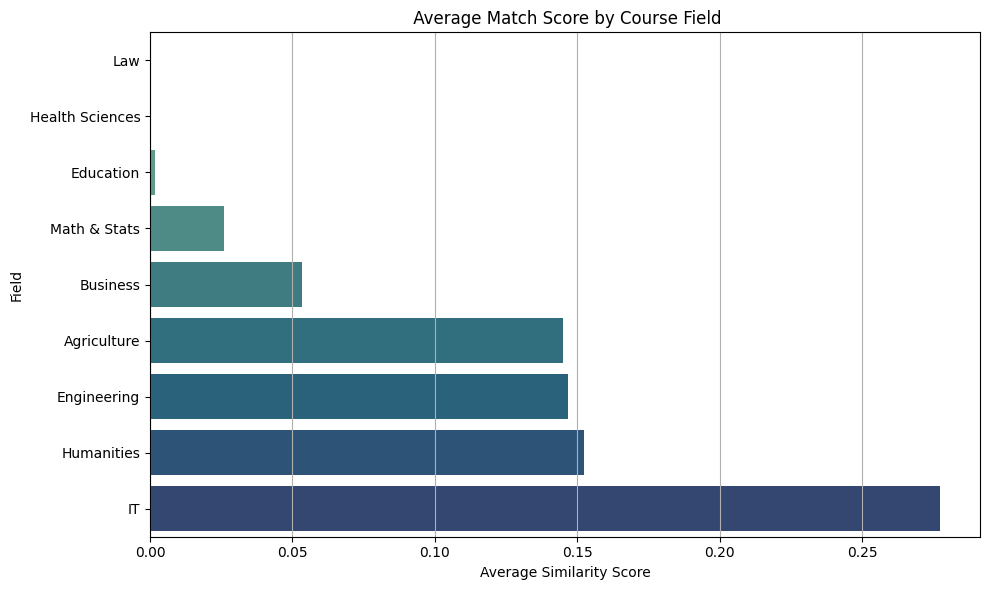

In [90]:
field_scores = merged_eval.groupby("Field")["Similarity_Score"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=field_scores.values, y=field_scores.index, palette="crest")
plt.title(" Average Match Score by Course Field")
plt.xlabel("Average Similarity Score")
plt.ylabel("Field")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

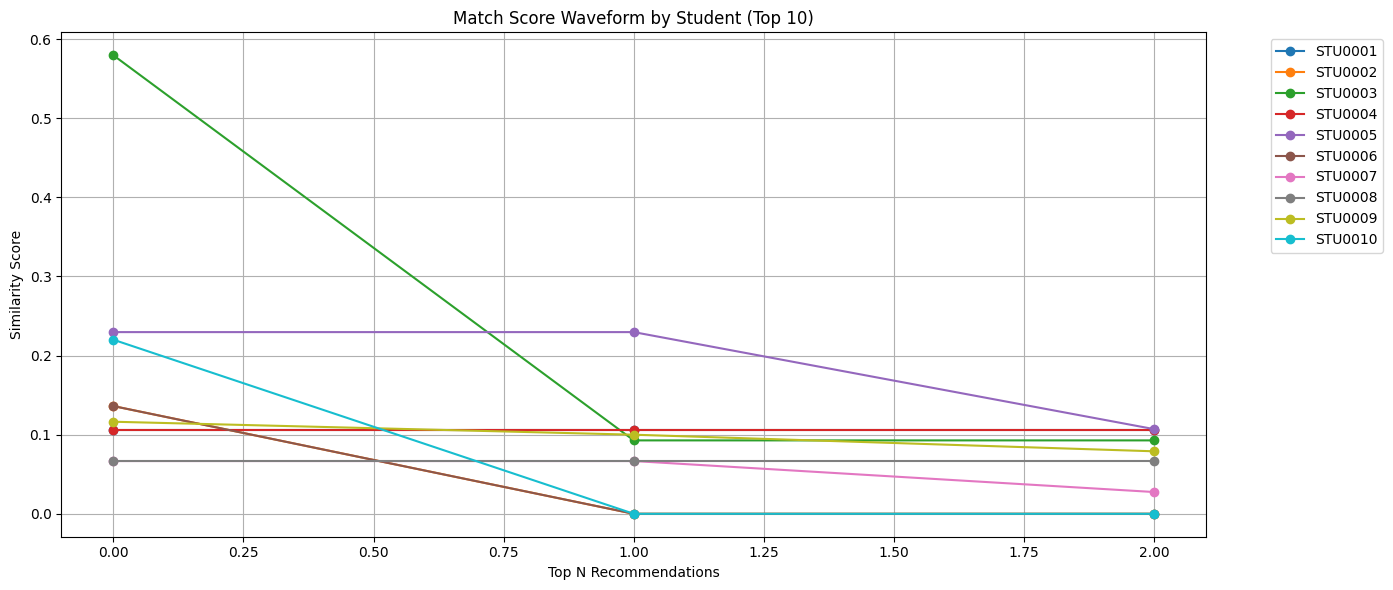

In [92]:
plt.figure(figsize=(14, 6))
for sid in merged_eval["StudentID"].unique()[:10]:  # show only first 10 for clarity
    s_scores = merged_eval[merged_eval["StudentID"] == sid]["Similarity_Score"].values
    plt.plot(range(len(s_scores)), s_scores, marker='o', label=sid)

plt.title("Match Score Waveform by Student (Top 10)")
plt.xlabel("Top N Recommendations")
plt.ylabel("Similarity Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
